In [96]:
from wordcloud import WordCloud
import re
import pymorphy2 as pm
import matplotlib.pyplot as plt
import json
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/anatoly/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
from stop_words import get_stop_words

In [98]:
stop_words = get_stop_words('ru') #+ ["глеб", "егор", "ребята", "метр", "хотеть", "андрей", "давать", "артём", "артем"]
morph = pm.MorphAnalyzer()
def words(text):
    nolinks = ' '.join([word for word in text.split() if (not re.findall('https?://|\w\.\w', word))])#удалили ссылки
    clean_line = re.sub('ё', 'е', nolinks.lower().strip())
    ws = word_tokenize(clean_line)
    ws = [morph.parse(w)[0].normal_form for w in ws]
    return [word for word in ws if word not in stop_words]

In [99]:
messages = []
for i in range(0, 21):
    data = json.load(open('{}.json'.format(i)))
    messages += [msg["body"] for msg in data["response"]["items"]]

In [100]:
better_messages = [' '.join(words(message)) for message in messages]

In [101]:
better_text = ' '.join(better_messages)

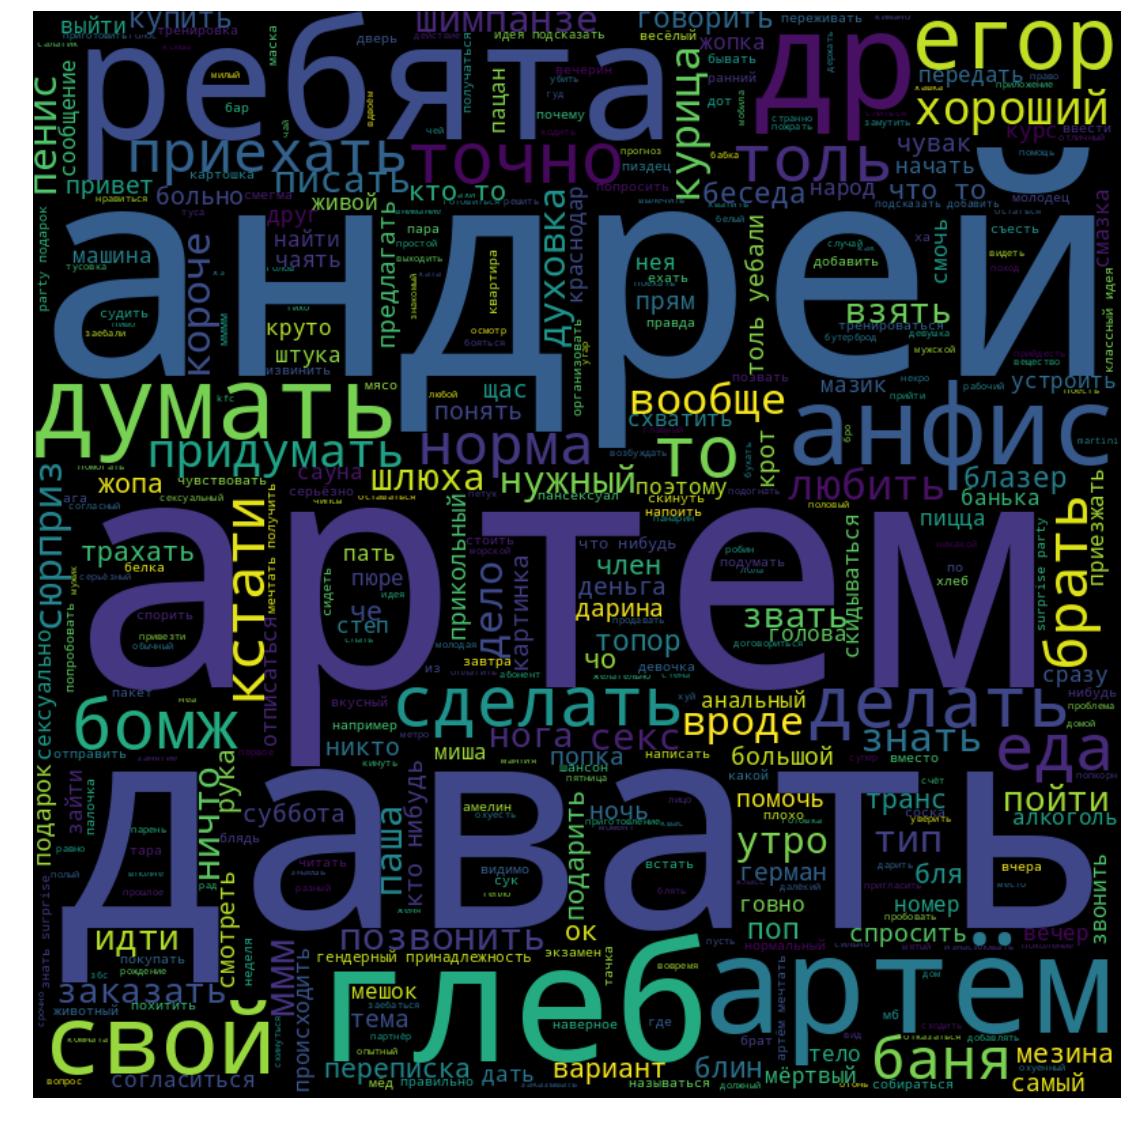

In [102]:
cloud = WordCloud(width=800, height=800, max_words=400).generate(better_text)
plt.figure(figsize=(20,20))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()